 # Transverse field Ising model to demo primitivess

In [7]:
from qiskit import QuantumCircuit
import numpy as np
from qiskit.circuit.library import YGate, UnitaryGate

SYGate = UnitaryGate(YGate().power(1/2),label=r"$\sqrt{Y}$")
SYdgGate = UnitaryGate(SYGate.inverse(),label=r"$\sqrt{Y}^{\dag}$")
def generate_1d_tfim_circuit(num_qubits, num_trotter_steps, rx_angle):
    qc = QuantumCircuit(num_qubits)
    for trotter_step in range(num_trotter_steps):
        add_1d_tfim_trotter_layer(qc, rx_angle)

    return qc

def add_1d_tfim_trotter_layer(qc, rx_angle):
    #adding Rzz in the even layers
    for i in range(0, qc.num_qubits-1, 2):
        qc.sdg([i,i+1])
        qc.append(SYGate, [i+1])
        qc.cx(i,i+1)
        qc.append(SYdgGate, [i+1])
        
    for i in range(1, qc.num_qubits-1, 2):
        qc.sdg([i,i+1])
        qc.append(SYGate, [i+1])
        qc.cx(i,i+1)
        qc.append(SYdgGate, [i+1])
    qc.rx(rx_angle, list(range(qc.num_qubits)))


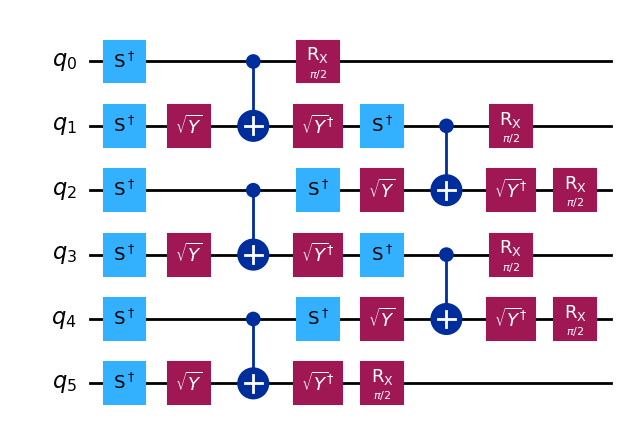

In [8]:
num_qubits = 6
num_trotter_steps= 1
rx_angle= 0.5* np.pi

qc = generate_1d_tfim_circuit(num_qubits,num_trotter_steps, rx_angle)
qc.draw(output='mpl', fold =-1)


